In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import js2py

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     35.06
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.42e-07
Time:                        18:50:58   Log-Likelihood:                -214.96
No. Observations:                  55   AIC:                             433.9
Df Residuals:                      53   BIC:                             437.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.0654     42.961      6.542      0.0

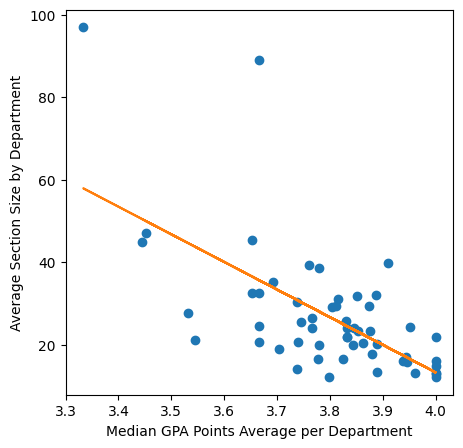

In [186]:
#Question 1 - Data Visualization
#Plot 1 - Scatter Plot/Regression Line of Best Fit

#Import and filter data
data = pd.read_csv("https://raw.githubusercontent.com/dali-lab/dali-challenges/main/data/Dartmouth%20-%20Courses.csv")
data_filtered = data.dropna()

#Find mean values of gpa medians and average section sizes in each department
average_gpa_by_department = data_filtered.groupby('Department')['Median GPA Points'].mean()
average_gpa_values = average_gpa_by_department.values
average_section_size_by_department = data_filtered.groupby('Department')['Average Section Size'].mean()
average_section_size_values = average_section_size_by_department.values

#Perform regression analysis and store values
Y = average_section_size_values
X = sm.add_constant(average_gpa_values)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())
b_fit,a_fit = results.params

#Create scatter plot of values as well as line of best fit
x = average_gpa_values
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x, Y, 'o', label="data") 
ax.plot(average_gpa_values, b_fit + a_fit * average_gpa_values)
ax.set_xlabel("Median GPA Points Average per Department")
ax.set_ylabel("Average Section Size by Department")

#Create graph in D3.js Javascript library
html = mpld3.fig_to_html(fig)
with open('regression.html', 'w') as f:
    f.write(html)

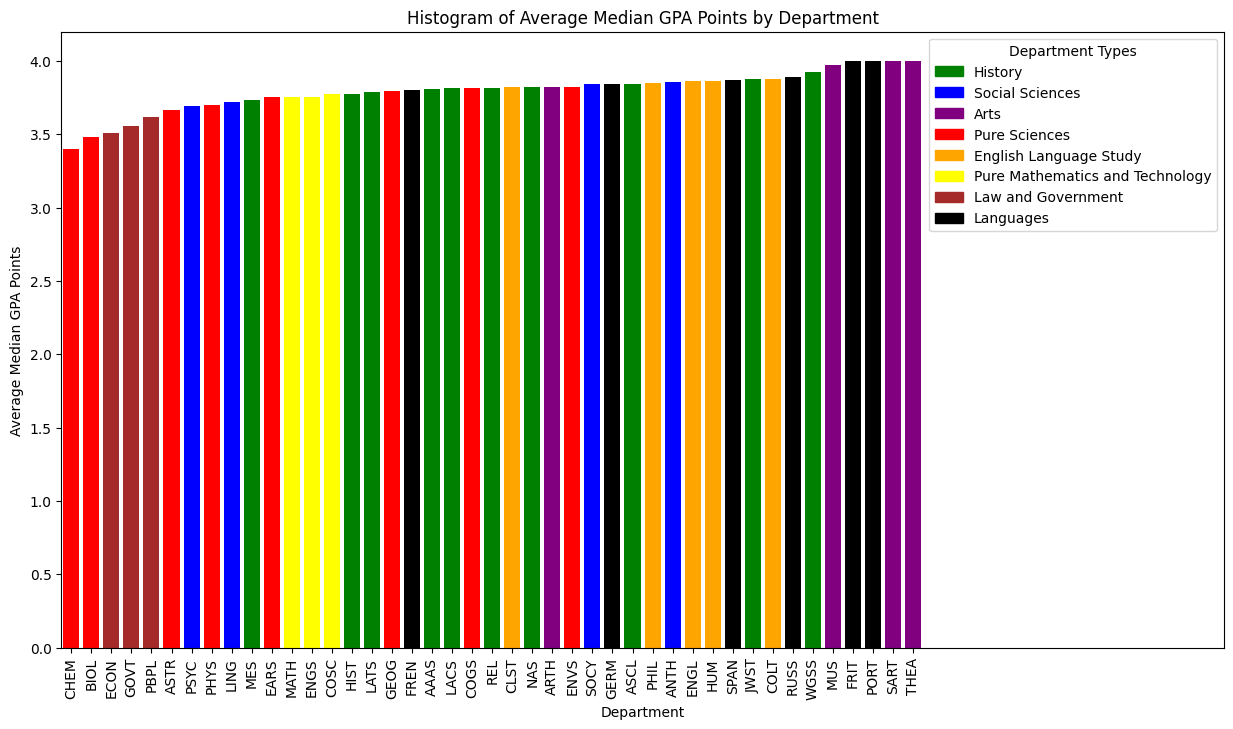

In [192]:
#Plot 2 - Histogram
import pandas as pd
import matplotlib.pyplot as plt
import mpld3

data = pd.read_csv("https://raw.githubusercontent.com/dali-lab/dali-challenges/main/data/Dartmouth%20-%20Courses.csv")
data_filtered = data.dropna(subset = ['Department','Median GPA Points'])
average_gpa_by_department = data_filtered.groupby('Department')['Median GPA Points'].mean()
#From average GPA medians by department, sort in ascending order
average_gpa_sorted = average_gpa_by_department.sort_values()
#Classify departments (note this is my own interpretation and may not be 
#the most accurate in terms of an actual course classification)
identified_departments = {
    'AAAS': 'History',
    'ANTH': 'Social Sciences',
    'ARTH': 'Arts',
    'ASCL': 'History',
    'ASTR': 'Pure Sciences',
    'BIOL': 'Pure Sciences',
    'CHEM': 'Pure Sciences',
    'CLST': 'English Language Study',
    'COGS': 'Pure Sciences',
    'COLT': 'English Language Study',
    'COSC': 'Pure Mathematics and Technology',
    'EARS': 'Pure Sciences',
    'ECON': 'Law and Government',
    'ENGL': 'English Language Study',
    'ENGS': 'Pure Mathematics and Technology',
    'ENVS': 'Pure Sciences',
    'FREN': 'Languages',
    'FRIT': 'Languages',
    'GEOG': 'Pure Sciences',
    'GERM': 'Languages',
    'GOVT': 'Law and Government',
    'HIST': 'History',
    'HUM': 'English Language Study',
    'JWST': 'History',
    'LACS': 'History',
    'LACS': 'History',
    'LATS': 'History',
    'LING': 'Social Sciences',
    'MATH': 'Pure Mathematics and Technology',
    'MES': 'History',
    'MUS': 'Arts',
    'NAS': 'History',
    'PBPL': 'Law and Government',
    'PHIL': 'English Language Study',
    'PHYS': 'Pure Sciences',
    'PORT': 'Languages',
    'PSYC': 'Social Sciences',
    'REL': 'History',
    'RUSS': 'Languages',
    'SART': 'Arts',
    'SOCY': 'Social Sciences',
    'SPAN': 'Languages',
    'THEA': 'Arts',
    'WGSS': 'History'
}

#Assign colors to individual departments
department_colors = {
    'History': 'green',
    'Social Sciences': 'blue',
    'Arts': 'purple',
    'Pure Sciences': 'red',
    'English Language Study': 'orange',
    'Pure Mathematics and Technology': 'yellow',
    'Law and Government': 'brown',
    'Languages': 'black'
}

#Create plot and sort by color
fig, ax = plt.subplots(figsize=(15, 8))
for department, gpa in average_gpa_sorted.items():
    if department in identified_departments:
        department_type = identified_departments[department]
        color = department_colors.get(department_type, 'gray')
        ax.bar(department, gpa, color=color)

#Legend for plot
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in department_colors.values()]
labels = department_colors.keys()
ax.legend(handles, labels, title='Department Types')

#Labels for plot
ax.set_xlabel('Department')
ax.set_ylabel('Average Median GPA Points')
ax.set_title('Histogram of Average Median GPA Points by Department')
plt.xticks(rotation=90)

#Shift graph to clearly show all departments as well as legend
plt.xlim(-0.5, len(average_gpa_sorted) - 0.5)

html_content = mpld3.fig_to_html(fig)
with open("histogram.html", "w") as file:
    file.write(html_content)

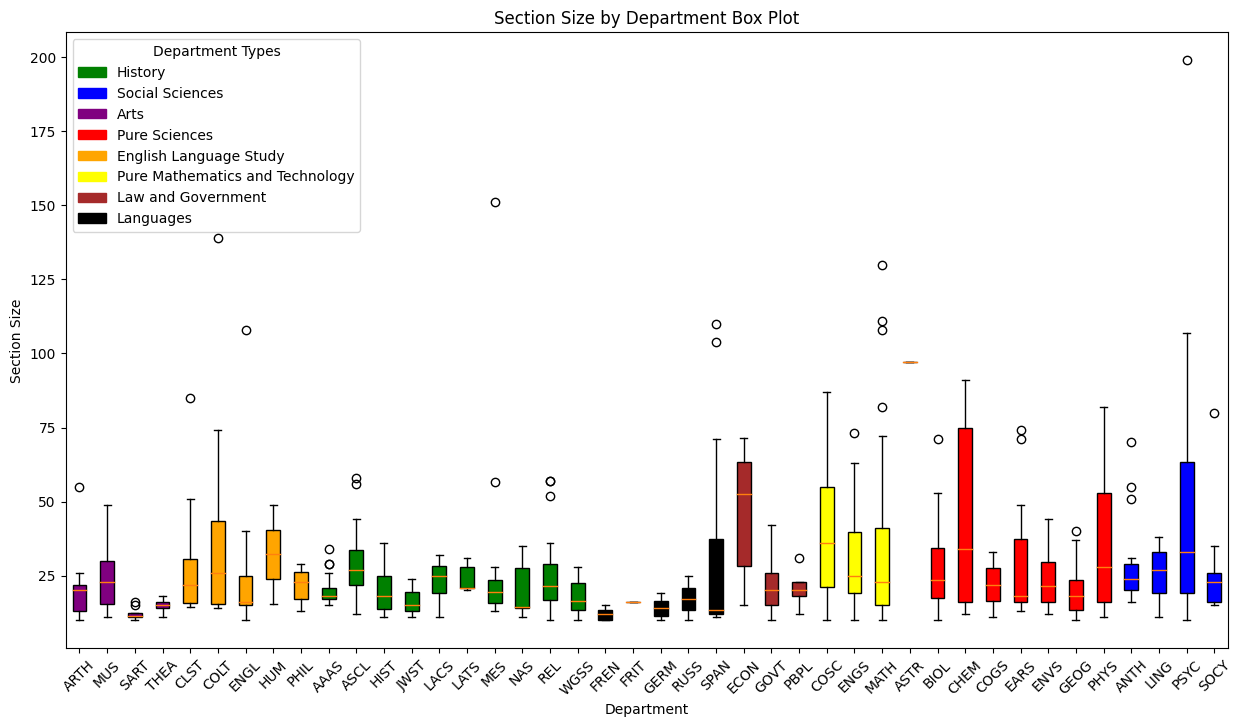

In [190]:
#Plot 3 - Boxplot
#Store data, group by department, and extract average section size
data = pd.read_csv("https://raw.githubusercontent.com/dali-lab/dali-challenges/main/data/Dartmouth%20-%20Courses.csv")
data_filtered = data.dropna()
data_with_index = data_filtered.set_index('Department')
section_size_by_department = data_with_index.groupby('Department')['Average Section Size'].apply(list).to_dict()

identified_departments = {
    'AAAS': 'History',
    'ANTH': 'Social Sciences',
    'ARTH': 'Arts',
    'ASCL': 'History',
    'ASTR': 'Pure Sciences',
    'BIOL': 'Pure Sciences',
    'CHEM': 'Pure Sciences',
    'CLST': 'English Language Study',
    'COGS': 'Pure Sciences',
    'COLT': 'English Language Study',
    'COSC': 'Pure Mathematics and Technology',
    'EARS': 'Pure Sciences',
    'ECON': 'Law and Government',
    'ENGL': 'English Language Study',
    'ENGS': 'Pure Mathematics and Technology',
    'ENVS': 'Pure Sciences',
    'FREN': 'Languages',
    'FRIT': 'Languages',
    'GEOG': 'Pure Sciences',
    'GERM': 'Languages',
    'GOVT': 'Law and Government',
    'HIST': 'History',
    'HUM': 'English Language Study',
    'JWST': 'History',
    'LACS': 'History',
    'LATS': 'History',
    'LING': 'Social Sciences',
    'MATH': 'Pure Mathematics and Technology',
    'MES': 'History',
    'MUS': 'Arts',
    'NAS': 'History',
    'PBPL': 'Law and Government',
    'PHIL': 'English Language Study',
    'PHYS': 'Pure Sciences',
    'PSYC': 'Social Sciences',
    'REL': 'History',
    'RUSS': 'Languages',
    'SART': 'Arts',
    'SOCY': 'Social Sciences',
    'SPAN': 'Languages',
    'THEA': 'Arts',
    'WGSS': 'History'
}

department_colors = {
    'History': 'green',
    'Social Sciences': 'blue',
    'Arts': 'purple',
    'Pure Sciences': 'red',
    'English Language Study': 'orange',
    'Pure Mathematics and Technology': 'yellow',
    'Law and Government': 'brown',
    'Languages': 'black'
}

#Sort departments by type and extract section size
sorted_departments = sorted(identified_departments.keys(), key=lambda x: identified_departments[x])
sorted_section_size = [section_size_by_department[department] for department in sorted_departments]

#Generate boxplot
fig, ax = plt.subplots(figsize = (15,8))
boxplot = ax.boxplot(sorted_section_size, patch_artist=True)

#Assign each boxplot a color
for i, box in enumerate(boxplot['boxes']):
    department = sorted_departments[i]
    department_type = identified_departments[department]
    box.set(facecolor=department_colors[department_type])

#Labels for plot
ax.set_xlabel('Department')
ax.set_ylabel('Section Size')
ax.set_title('Section Size by Department Box Plot')
ax.set_xticklabels(sorted_departments, rotation=45)

#Legend for plot
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in department_colors.values()]
labels = department_colors.keys()
ax.legend(handles, labels, title='Department Types')


html = mpld3.fig_to_html(fig)
with open('boxplot.html', 'w') as f:
    f.write(html)

Department: AAAS, Predicted Average Median GPA Points: 3.8071922472598465, Actual Average Median GPA Points: 3.855072463768116
Department: ANTH, Predicted Average Median GPA Points: 3.857107109558648, Actual Average Median GPA Points: 3.839506172839506
Department: ARTH, Predicted Average Median GPA Points: 3.786785059163384, Actual Average Median GPA Points: 3.833333333333333
Department: ASCL, Predicted Average Median GPA Points: 3.843390400901101, Actual Average Median GPA Points: 3.8636363636363638
Department: BIOL, Predicted Average Median GPA Points: 3.616040694772098, Actual Average Median GPA Points: 3.533333333333333
Department: CLST, Predicted Average Median GPA Points: 3.799368920866572, Actual Average Median GPA Points: 3.8216230936819167
Department: COLT, Predicted Average Median GPA Points: 3.9448402285697965, Actual Average Median GPA Points: 3.875
Department: COSC, Predicted Average Median GPA Points: 3.7809504299503285, Actual Average Median GPA Points: 3.792311425720374

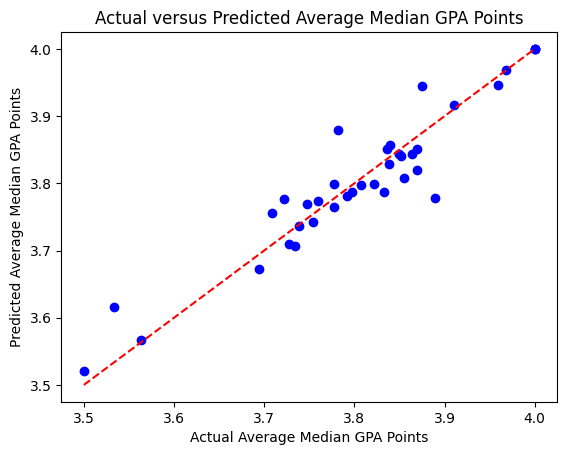

In [198]:
#Question 2 - Machine Learning

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Store data
data = pd.read_csv("https://raw.githubusercontent.com/dali-lab/dali-challenges/main/data/Dartmouth%20-%20Courses.csv")
data_filtered = data.dropna(subset=['Enrollments', 'Median GPA Points', 'Average Section Size', 'Department'])
data_with_index = data_filtered.set_index('Department')

#Generate list of department names and initialize list of average GPAs
departments = data_filtered['Department'].unique()
department_avg_gpa = {}

for department in departments:
    department_data = data_filtered[data_filtered['Department'] == department]
    #Tune specifically to entries with enough data points
    if len(department_data) < 10:
        continue
    #Utilize enrollments and average section size data to predict gpa points
    x = department_data[['Enrollments', 'Average Section Size']]
    y = department_data['Median GPA Points']
    
    #Standardize, fit to data, and generate testing/training data
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)
    
    #Check a range of alpha values for ridge model
    alphas = np.logspace(-3, 3, num=100)
    regression = RidgeCV(alphas=alphas)
    regression.fit(x_train, y_train)
    #Find prediction and calculate as well as store mean for each department
    y_pred = regression.predict(x_test) 
    avg_gpa = y_pred.mean()
    department_avg_gpa[department] = avg_gpa

#Actual average median GPA points by department (as calculated earlier)
average_gpa_by_department = data_filtered.groupby('Department')['Median GPA Points'].mean()

#Generate list of predicted and actual median GPA points by department 
predicted_gpa = np.array([])
actual_gpa = np.array([])
for department, avg_gpa in department_avg_gpa.items():
    predicted_gpa = np.append(predicted_gpa, avg_gpa)
    actual_gpa = np.append(actual_gpa, average_gpa_by_department[department])

#Print to screen predicted and actual GPA
for department, avg_gpa in department_avg_gpa.items():
    print(f"Department: {department}, Predicted Average Median GPA Points: {avg_gpa}, Actual Average Median GPA Points: {average_gpa_by_department[department]}")

#Generate MSE and R^2 coefficient
mse = mean_squared_error(actual_gpa, predicted_gpa)
r2 = r2_score(actual_gpa, predicted_gpa)
print("Mean Squared Error:", mse)
print("R-Squared Coefficient:", r2)

#Generate plot showing actual vs. predicted plot versus idealized equation
plt.scatter(actual_gpa, predicted_gpa, color='blue')
plt.plot([actual_gpa.min(), actual_gpa.max()], [actual_gpa.min(), actual_gpa.max()], color='red', linestyle='--')
plt.xlabel('Actual Average Median GPA Points')
plt.ylabel('Predicted Average Median GPA Points')
plt.title('Actual versus Predicted Average Median GPA Points')
plt.show()

In [ ]:
#As shown in question 1 plot 1, it was evident that though the correlation between
#average section size by department and median GPA points average by 
#department is clearly present, albeit a small R^2 value of about 0.4. There is
#an evident downward sloping linear trend and a line of best fit which closely
#matches this trend, despite being some distance from the line itself. 
#This seems to indicate that the regression model does explain the observed data
#well due to this high R^2 value, thereby suggesting that the regression model 
#does seem to accurately estimate the data set. We cannot only rely on this 
#statistic, but it is a good indicator that there may be a strong relationship 
#between these independent variables and rank. Another possible interpretation is
#of he p-values for each coefficient, which express the likelihood that the data
#occurs by random chance (or that the null hypothesis is true), such that the 
#smaller the p-value, the stronger the evidence that the null hypothesis should 
#be rejected. Specifically, if the p-value is less than or equal to 0.05, then 
#it is statistically significant such that we reject the null hypothesis and 
#accept the alternative hypothesis. We note that the p-values for average gpa 
#and the constant are <= 0.05, which indicates that they are statistically 
#significant and that the data likely does not occur by random chance. These
#two conclusions may not fully justify the claim but certianly support the fact
#that as average section size per department decreases, the average GPA per 
#department increases, thus suggesting that smaller departments have higher 
#GPAs. This intuitively makes sense, as a department with more students would
#lead to a broader range of scores as well as likely less individual help.

#As shown in question 1 plot 2, pure sciences courses, law and 
#government courses, and pure mathematics and technology courses consistently 
#have lower GPAs. This aligns with what one might expect for exam-heavy 
#courses. In a similar fashion, arts, languages, and english language studies
#tend to have very high GPAs, perhaps due to the different means of assessment 
#which involve less restricted time allotments.

#As shown in question 1 plot 3, aside from ECON, the middle 50% of the data
#falls between about 10 - 40 individuals per section, which suggests that 
#overall, Dartmouth tends to keep its class sizes small as advertised. All 
#history and art courses tend to be below 50 aside from some 
#rare outliers, which is likely due to the importance of participation in
#these courses. Similarly, pure science/mathematics and technology courses 
#tend to have a wide range of average section size due to the lecture-based
#nature of many of these courses, with upper-level courses being much smaller.

#From plot 1, I learned there is a potential relationship between GPA and
#section size, from plot 2, I learned that smaller departments tend to have
#higher GPAs, and from plot 3, I learned that there is a specific trend 
#where art and history are much smaller in section size as compared to 
#science and mathematics courses. Thus, I wanted to answer the question as 
#to whether average section size and enrollment can predict median GPA 
#average by department. My original thoughts were that this would in fact
#be possible, but only if the data set were constrained for larger sets
#of values (i.e. very small departments may mess up the predictive ability of
#the model). As shown above, the model ended up being very accurate, and after
#running multiple times, it returns a correlation typically above 0.7, and often
#above 0.85. This can be attributed to iterating through a range of alpha values
#to fine-tune the model. The output above indicates that the difference between 
#the actual and predicted instances are quite close, at most with a difference of
#about 0.1, with most being within 0.05. This is supported by the very low 
#MSE value, which suggests the model captures the trend of the data accurately 
#and that there are no obvious outliers. Similarly, the high R^2 value reflects 
#that the model does in fact account for much of the observed variation in the 
#data. These trends are reflected by the plot, which shows a line of best fit
#where much of the data points are close to the line of best fit.
